# Titanic (Machine Learning from Disaster) - Model1-tester


In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.patches as mpatches

from sklearn.model_selection import train_test_split


from setup_notebook import setup_path
setup_path()
from src.functions import *

from matplotlib.colors import LinearSegmentedColormap
import warnings

warnings.filterwarnings("ignore")




from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score,RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.base import clone

In [2]:
# Carregando os dados
dfo = pd.read_csv("/home/akel/PycharmProjects/Kaggle/Titanic/data/raw/train.csv")
df=dfo.drop(columns='PassengerId')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Pre-processamento

In [3]:
# SPLIT
RANDOM_STATE = 42
TEST_SIZE = 0.3
TARGET = 'Survived'
X = df.drop(columns=TARGET)
y = df[TARGET]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE )

In [5]:
def feature_engineering(df):
    if 'Cabin' in df.columns:
    # Variable HasCabin
        df['HasCabin'] =df['Cabin'].notnull().astype(int)
    # Variable HasCabin 
        df['Deck'] = df['Cabin'].apply(lambda x: 'U' if pd.isnull(x) or str(x)[0] == 'T' else str(x)[0])
        df.drop(columns='Cabin', inplace=True)
  
# fill with mode
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]) 

# Variable Age imputed is Age2
    if 'Age' in df.columns:
        df['Age2'] = df['Age'].copy()
        
        group_cols = ['Sex', 'Pclass', 'HasCabin']

        for k in range(len(group_cols), 0, -1):
            if df['Age2'].isnull().sum() == 0:
                break
            df['Age2'] = df['Age2'].fillna(df.groupby(group_cols[:k])['Age']
                                           .transform('median'))
        df['Age2'] = df['Age2'].fillna(df['Age'].median())
        
        df.drop(columns='Age', inplace=True)

  
# Variable FamilySize
    df['FamilySize'] = df['SibSp'] +df['Parch'] + 1

    drop_cols = ['Name', 'Ticket']

    df = df.drop(drop_cols, axis=1)

    df = pd.get_dummies(df)


    return df

In [6]:
X_train = feature_engineering(X_train)
X_test = feature_engineering(X_test)


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize Model
model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

# Cross Validation Score Check 
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Average CV Accuracy: {np.mean(cv_scores)*100:.2f}%")

# Fit Model
model.fit(X_train, y_train)
print("Model Trained Successfully!")

Average CV Accuracy: 82.19%
Model Trained Successfully!


In [8]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print(f"{'='*70}")
print(f"🎯 Random Forest Padrão")
print(f"{'='*70}")
print(f"📊 **Acurácia no Teste**: {accuracy_score(y_test, y_pred):.4f}")
print(f"\n📋 **Relatório de Classificação**:")
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
print(f"🎯 **Matriz de Confusão**:")
print(f"               Previsto 0   Previsto 1")
print(f"Real 0         {cm[0,0]:<11} {cm[0,1]:<11}")
print(f"Real 1         {cm[1,0]:<11} {cm[1,1]:<11}")
print(f"{'─'*70}")

🎯 Random Forest Padrão
📊 **Acurácia no Teste**: 0.7836

📋 **Relatório de Classificação**:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       157
           1       0.77      0.68      0.72       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

🎯 **Matriz de Confusão**:
               Previsto 0   Previsto 1
Real 0         135         22         
Real 1         36          75         
──────────────────────────────────────────────────────────────────────


In [9]:
## outros testes
# Padronização apenas das contínuas do treino
cont_features = ["Pclass","Age2","Fare","FamilySize"]

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[cont_features] = scaler.fit_transform(X_train[cont_features])  # aprende só do treino
X_test_scaled[cont_features] = scaler.transform(X_test[cont_features])        # aplica mesma transformação

rf_model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)
print(f"{'='*70}")
print(f"🎯 Random Forest Padrão")
print(f"{'='*70}")
print(f"📊 **Acurácia no Teste**: {accuracy_score(y_test, y_pred):.4f}")
print(f"\n📋 **Relatório de Classificação**:")
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
print(f"🎯 **Matriz de Confusão**:")
print(f"               Previsto 0   Previsto 1")
print(f"Real 0         {cm[0,0]:<11} {cm[0,1]:<11}")
print(f"Real 1         {cm[1,0]:<11} {cm[1,1]:<11}")
print(f"{'─'*70}")



🎯 Random Forest Padrão
📊 **Acurácia no Teste**: 0.7873

📋 **Relatório de Classificação**:
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       157
           1       0.78      0.68      0.73       111

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268

🎯 **Matriz de Confusão**:
               Previsto 0   Previsto 1
Real 0         135         22         
Real 1         35          76         
──────────────────────────────────────────────────────────────────────


In [10]:
X_train.columns

Index(['Pclass', 'SibSp', 'Parch', 'Fare', 'HasCabin', 'Age2', 'FamilySize',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G',
       'Deck_U'],
      dtype='object')

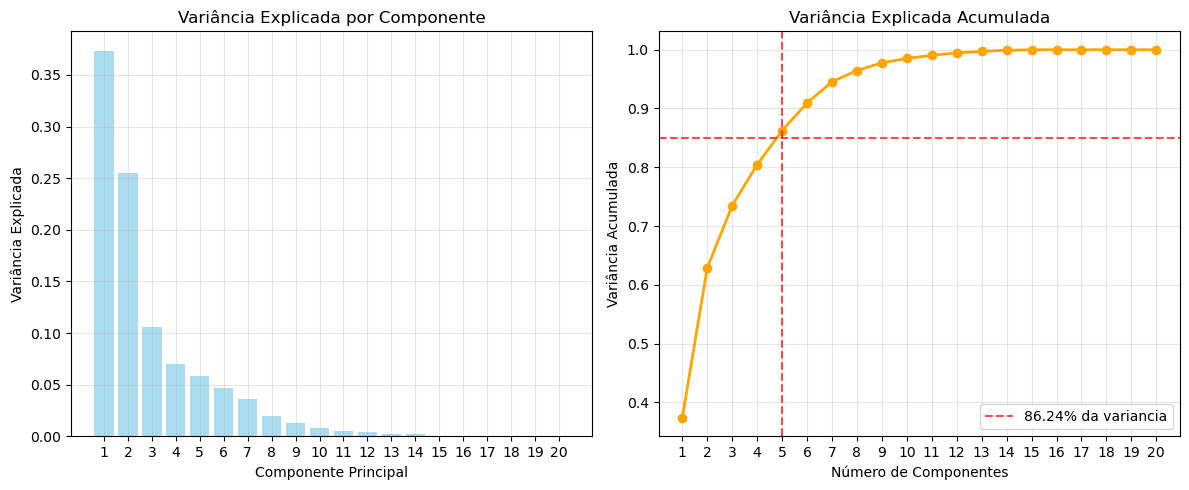

Os primeiros 5 componentes explicam 86.24%
Total de componentes disponíveis: 20


In [11]:
#D-REDUÇÃO DA DIMENSIONALIDADE
# Teste para avaliar variancia acumulada > 85%
pca_teste=PCA()
pca_teste.fit(X_train_scaled)
explained_variance = pca_teste.explained_variance_ratio_
# Variância explicada acumulada
cumulative_variance = explained_variance.cumsum()
# Encontrar número de componentes para 85% de variância
var_acumulada=0.85
n_components = np.argmax(cumulative_variance >= var_acumulada) +1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Gráfico 1: Variância explicada individual
components = range(1, len(explained_variance) + 1)
ax1.bar(components, explained_variance, alpha=0.7, color='skyblue')
ax1.set_xlabel('Componente Principal')
ax1.set_ylabel('Variância Explicada')
ax1.set_title('Variância Explicada por Componente')
ax1.set_xticks(components)
ax1.grid(True, alpha=0.3)

# Gráfico 2: Variância acumulada
ax2.plot(components, cumulative_variance, 'o-', color='orange', linewidth=2)
ax2.axhline(y=var_acumulada, color='red', linestyle='--', alpha=0.7, label=f"{cumulative_variance[n_components-1]:.2%} da variancia")
ax2.axvline(x=n_components, color='red', linestyle='--', alpha=0.7)
ax2.set_xlabel('Número de Componentes')
ax2.set_ylabel('Variância Acumulada')
ax2.set_title('Variância Explicada Acumulada')
ax2.set_xticks(components)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
# Informações adicionais
print(f"Os primeiros {n_components} componentes explicam {cumulative_variance[n_components-1]:.2%}")
print(f"Total de componentes disponíveis: {len(explained_variance)}")

In [12]:
# Transformar variavel PCA full-->8( na base de treino e test)
pca8 = PCA(n_components= 6 )
pca8.fit(X_train_scaled)
X_train_pca = pca8.transform(X_train_scaled)
X_test_pca = pca8.transform(X_test_scaled)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

rf_model.fit(X_train_pca, y_train)

y_pred = rf_model.predict(X_test_pca)
print(f"{'='*70}")
print(f"🎯 Random Forest Padrão")
print(f"{'='*70}")
print(f"📊 **Acurácia no Teste**: {accuracy_score(y_test, y_pred):.4f}")
print(f"\n📋 **Relatório de Classificação**:")
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
print(f"🎯 **Matriz de Confusão**:")
print(f"               Previsto 0   Previsto 1")
print(f"Real 0         {cm[0,0]:<11} {cm[0,1]:<11}")
print(f"Real 1         {cm[1,0]:<11} {cm[1,1]:<11}")
print(f"{'─'*70}")

🎯 Random Forest Padrão
📊 **Acurácia no Teste**: 0.8097

📋 **Relatório de Classificação**:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       157
           1       0.81      0.71      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

🎯 **Matriz de Confusão**:
               Previsto 0   Previsto 1
Real 0         138         19         
Real 1         32          79         
──────────────────────────────────────────────────────────────────────
